Import Libraries

In [1]:
import arcpy
from arcgis.gis import GIS
import pandas as pd
from arcpy import env
from arcpy.sa import *

Set Environment

In [2]:
arcpy.env.workspace = r"D:\DSM\RASTERS" #should be the output
arcpy.env.overwriteOutput = True


Display Weinstadt Basemap

In [3]:
myGIS = GIS()

myMap = myGIS.map("Weinstadt",15)
myMap.basemap = 'dark-gray'
myMap


MapView(layout=Layout(height='400px', width='100%'))

Define Solar Radiation Parameters

In [4]:
inRaster = r"D:\DSM\RASTERS\raster3.tif"
latitude = 48.7932960406891
skySize = 200
timeConfig = TimeMultipleDays(2021, 1, 365)
dayInterval = 5
hourInterval = 0.5
zFactor = 1
calcDirections = 32
zenithDivisions = 16
azimuthDivisions = 16
diffuseProp = 0.3
transmittivity = 0.5
outDirectRad = ""
outDiffuseRad = ""
outDirectDur = ""

Execute Area Solar Radiation Tools

In [5]:
outGlobalRad = AreaSolarRadiation(inRaster, latitude, skySize, timeConfig,
   dayInterval, hourInterval, "NOINTERVAL", zFactor, "FLAT_SURFACE",
   calcDirections, zenithDivisions, azimuthDivisions, "UNIFORM_SKY",
   diffuseProp, transmittivity, outDirectRad, outDiffuseRad, outDirectDur)

Display Solar Potential Result

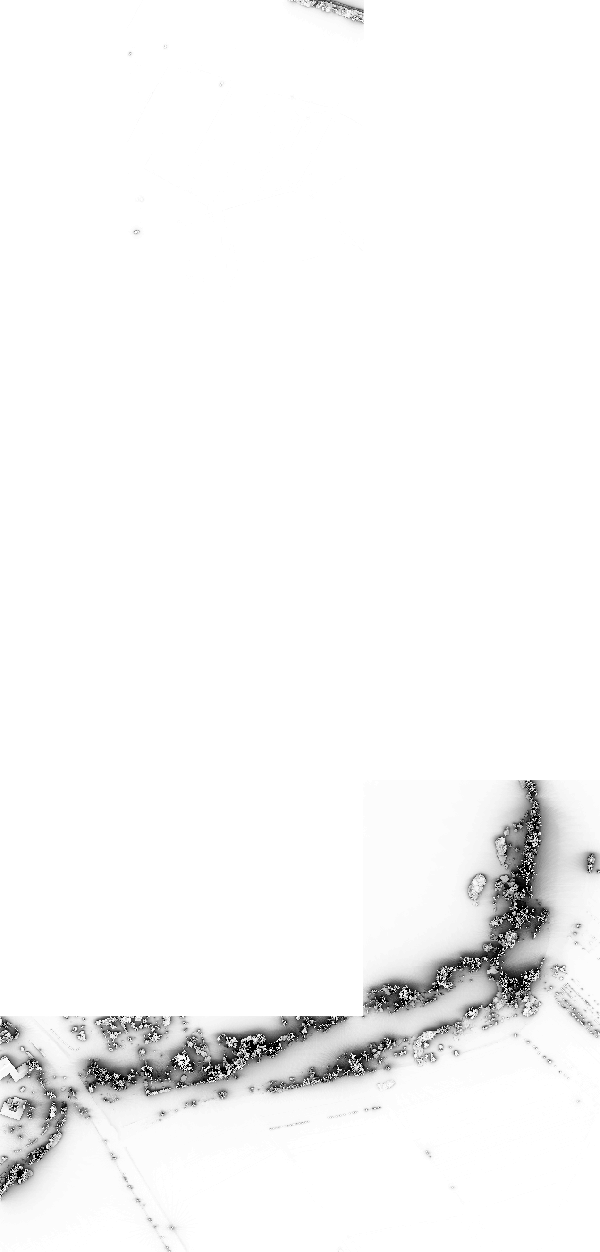

In [6]:
outGlobalRad

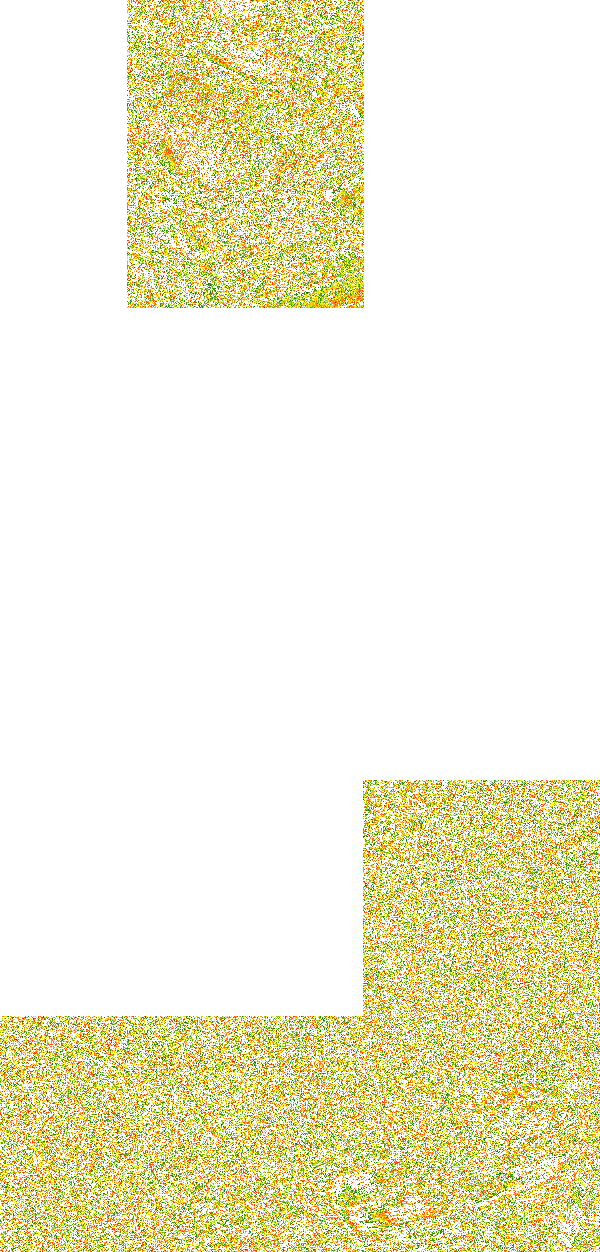

In [7]:
#myColorMap = {"values": [824, 235520, 479215], "colors": ['red','green','blue']}
#myColorMap = [[824, 255, 0, 0], [235520, 0, 255, 0], [479215, 0, 0, 255]]

Color_raster = Colormap(outGlobalRad, colormap = 'Condition Number')
Color_raster

In [8]:
import matplotlib.pyplot as plt
import numpy as np



In [9]:
inRas = arcpy.Raster(r"D:\DSM\RASTERS\AreaSol_raster31.tif")
lowerLeft = arcpy.Point(inRas.extent.XMin,inRas.extent.YMin)
cellSize = inRas.meanCellWidth

arr = arcpy.RasterToNumPyArray(inRas,nodata_to_value=0)
arr.min()


0.0

In [10]:

fig = plt.figure()
fig.set_figheight(500)
fig.set_figwidth(100)
plt.imshow(arr)